Understanding the objective:




The goal is to predict the salary of data-related positions based on location, company review, and job title is satisfactory or not


Import datasets:

In [3]:
from google.colab import files

In [4]:
uploaded = files.upload()

Saving 1-df.csv to 1-df.csv


Import libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_absolute_error
import pickle

Read the data

In [8]:
df_raw =pd.read_csv('1-df.csv')

Data Understanding

In [9]:
df_raw.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable
2,Data Science Manager,$111K-$181K (Glassdoor est.),-1.0,Decode_M,"New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable
3,Data Analyst,$111K-$181K (Glassdoor est.),3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
4,"Director, Data Science",$111K-$181K (Glassdoor est.),3.4,United Entertainment Group\n3.4,"New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable


The task I should do in this stage by seeing this data:


1- job title categorized by director, data science,...


2- Min and Max salaries can be extracted from the salary estimate and then averaged to create a new average salary column which is our response variable.


3- The company name does not matter to us


4- the state which is the location of the position can be extracted from the location column


5- so many unknowns from the revenue, so we do not use this column.

Assess Data

I am checking the raw data to understand the type of data I am dealing with.

In [10]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          5892 non-null   object 
 1   Salary Estimate    5892 non-null   object 
 2   Rating             5892 non-null   float64
 3   Company Name       5892 non-null   object 
 4   Location           5892 non-null   object 
 5   Size               5892 non-null   object 
 6   Founded            5892 non-null   object 
 7   Type of ownership  5892 non-null   object 
 8   Industry           5892 non-null   object 
 9   Sector             5892 non-null   object 
 10  Revenue            5892 non-null   object 
dtypes: float64(1), object(10)
memory usage: 506.5+ KB


Clean Data

1- create min and max salary columns for the positions and parse the corresponding value out of the raw data

2- creat average salary column

3- extracted the state where the positions are located. creat a state column

4- A title column was created to show the different categories for the posted roles, such as data engineer , deep learning , analyst

In [11]:
#remove instances without salary estimates
df = df_raw[df_raw['Salary Estimate'] != '-1']

In [12]:
#remove per hour salary
df = df[~df['Salary Estimate'].str.contains('Per Hour')]

In [13]:
#remove $
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace('$',' '))

In [14]:
#remove K
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace('K',' '))

In [15]:
#split it
df['Salary Estimate']=df['Salary Estimate'].apply(lambda x:x.split())

In [16]:
df['Min_salary'] = df['Salary Estimate'].apply(lambda x: x[0])
df['Max_salary'] = df['Salary Estimate'].apply(lambda x:x[2])

In [17]:
#cast Min_salary and Max_salary to int and get the average salary
df['Min_salary']= df['Min_salary'].apply(lambda x:int(x))
df['Max_salary']= df['Max_salary'].apply(lambda x:int(x))
df['Average_salary'] = (df.Min_salary + df.Max_salary)/2

In [18]:
# state of the job
df['State'] = df['Location'].apply (lambda x: x.split()[-1])
df = df[df.State != 'Kingdom'] #remove united kingdom

In [19]:
def title_organizer(x):
  """
  this function organizes the job title
  """
  x = x.lower()
  if ('data scientist' in x ) or ('data science' in x):
    return 'data scientist'
  elif 'data engineer' in x:
    return 'data engineer'
  elif 'deep learning' in x:
    return 'deep learning engineer'
  elif 'machine learning' in x:
    return 'machine learning engineer'
  elif 'director' in x:
    return 'director'
  elif 'manager' in x:
    return 'manager'
  elif 'analyst' in x:
    return 'analyst'
  elif 'resercher' in x:
    return 'researcher'
  else:
    return 'other'

In [20]:
df['Job Title'] = df['Job Title']. apply(title_organizer)

In [21]:
df = df[df['Rating']!=-1]

In [22]:
cleaned_df = df[['Job Title', 'Rating', 'Average_salary', 'State']]

In [23]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4891 entries, 0 to 5887
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Job Title       4891 non-null   object 
 1   Rating          4891 non-null   float64
 2   Average_salary  4891 non-null   float64
 3   State           4891 non-null   object 
dtypes: float64(2), object(2)
memory usage: 191.1+ KB


Exploratory Data Aanalysis (EDA)

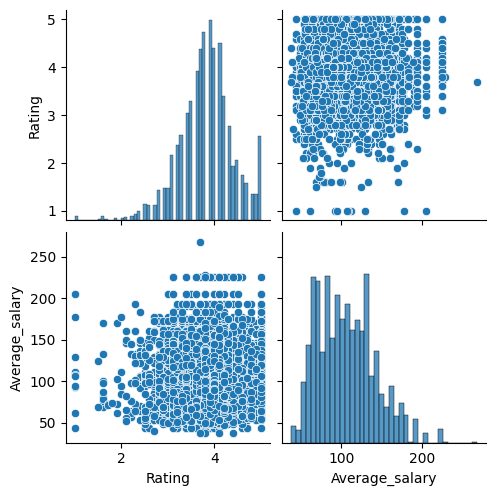

In [ ]:
sns.pairplot(cleaned_df)

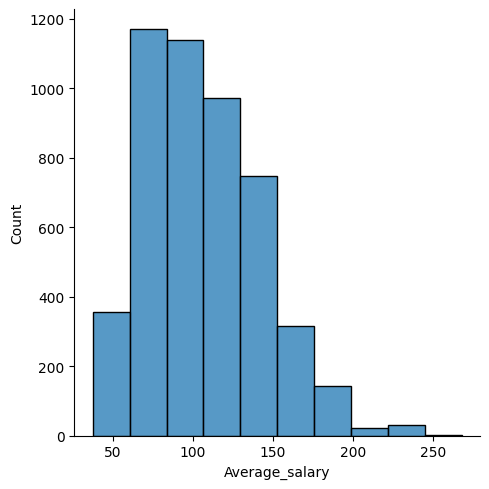

In [ ]:
sns.displot(x='Average_salary', data=cleaned_df, bins=10)

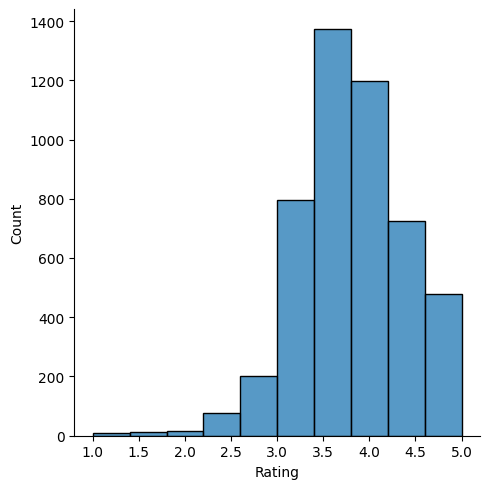

In [ ]:
sns.displot(x='Rating', data=cleaned_df, bins=10)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'data scientist'),
  Text(1, 0, 'analyst'),
  Text(2, 0, 'other'),
  Text(3, 0, 'data engineer'),
  Text(4, 0, 'manager'),
  Text(5, 0, 'machine learning engineer'),
  Text(6, 0, 'director'),
  Text(7, 0, 'deep learning engineer')])

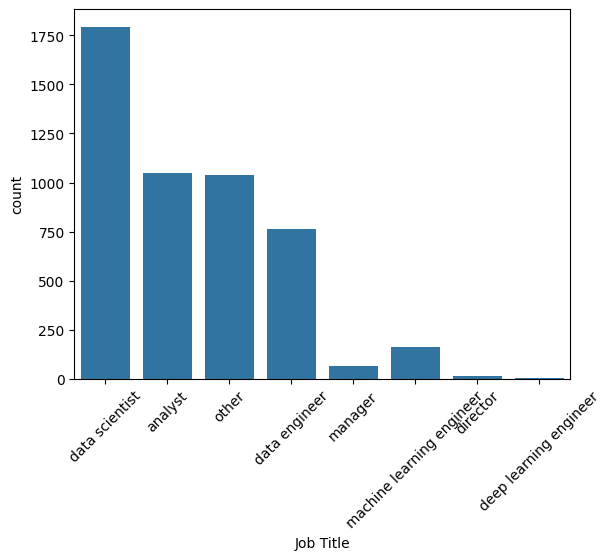

In [24]:
sns.countplot(x='Job Title', data=cleaned_df)
plt.xticks(rotation=45)

<Axes: xlabel='Rating', ylabel='Average_salary'>

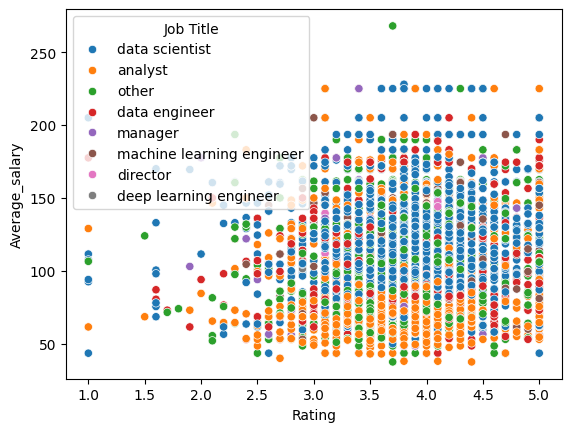

In [ ]:
sns.scatterplot(x='Rating', y='Average_salary', data=cleaned_df, hue='Job Title')

Feature Engineering:

In [25]:
preprocessed_df=pd.get_dummies(cleaned_df, columns=['Job Title', 'State'])

In [27]:
preprocessed_df

,Rating,Average_salary,Job Title_analyst,Job Title_data engineer,Job Title_data scientist,Job Title_deep learning engineer,Job Title_director,Job Title_machine learning engineer,Job Title_manager,Job Title_other,...,State_NC,State_NH,State_NJ,State_NM,State_NY,State_OH,State_PA,State_TX,State_VA,State_WI
0,3.5,146.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,4.5,146.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3.4,146.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3.4,146.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,2.9,146.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5881,3.2,51.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5882,4.2,68.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5883,4.0,89.5,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5886,4.0,89.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [28]:
preprocessed_df['Average_salary'].median()

102.0

In [35]:
def sat(x):
  if x>= 102:
    return(1)
  else:
    return(0)

In [34]:
preprocessed_df['satisfaction'] = preprocessed_df['Average_salary'].apply(sat)

In [36]:
preprocessed_df['satisfaction']

0       1
1       1
3       1
4       1
5       1
       ..
5881    0
5882    0
5883    0
5886    0
5887    0
Name: satisfaction, Length: 4891, dtype: int64

In [37]:
preprocessed_df[['satisfaction','Average_salary']]

,satisfaction,Average_salary
0,1,146.0
1,1,146.0
3,1,146.0
4,1,146.0
5,1,146.0
...,...,...
5881,0,51.0
5882,0,68.0
5883,0,89.5
5886,0,89.0


In [38]:
x = preprocessed_df.drop(columns=['Average_salary','satisfaction'])
y = preprocessed_df['satisfaction']

Modeling:

In [39]:
x_train,x_test,y_train, y_test= train_test_split(x,y,test_size= 0.3,random_state=101)

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logreg = LogisticRegression()

In [47]:
logreg.fit(x_train,y_train)

LogisticRegression()

In [48]:
#prediction
predictions = logreg.predict(x_test)
predictions


array([0, 1, 0, ..., 0, 1, 0])

In [49]:
y_test

4607    0
3136    1
2694    0
4633    0
4490    1
       ..
5366    0
2080    0
3348    0
1996    0
4704    1
Name: satisfaction, Length: 1468, dtype: int64

In [50]:
from sklearn.metrics import confusion_matrix

In [53]:
confusion_matrix (y_test,predictions)

array([[522, 200],
       [232, 514]])

In [54]:
len(y_test)

1468

In [55]:
522+200+232+514

1468

In [56]:
from sklearn.metrics import classification_report

In [57]:
print(classification_report (y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71       722
           1       0.72      0.69      0.70       746

    accuracy                           0.71      1468
   macro avg       0.71      0.71      0.71      1468
weighted avg       0.71      0.71      0.71      1468



In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(y_test,predictions)

0.7057220708446866